# Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



mms = MinMaxScaler()


# Load data. data.names contains info of column names and data types.

In [140]:
df = pd.read_csv('/Users/Ada/Downloads/adult.data', delimiter = ',', 
                 names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                          "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", 
                         "native-country", "salary"])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Visualization 1

Text(0, 0.5, 'Count')

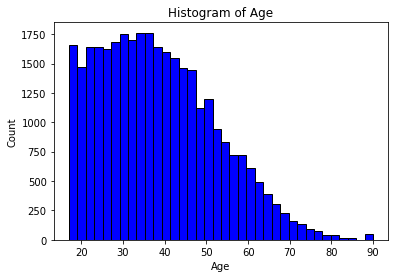

In [141]:
# matplotlib histogram
plt.hist(df['age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')

The histogram displays data by way of bars to show the frequency of numerical data. The encodings applied here are line marks, express value attribute with aligned vertical position, numerical data range with horizontal
position (book page 151). It fulfills the task of providing intuitive idea of age distribution by given dataset.  
The visulization tells us that there is not much data provided for people older than 70 so we could consider drop that part of data which makes sense since elder people got pension instead of wage.

# Visualization 2

Text(0, 0.5, 'Mean of hours-per-week')

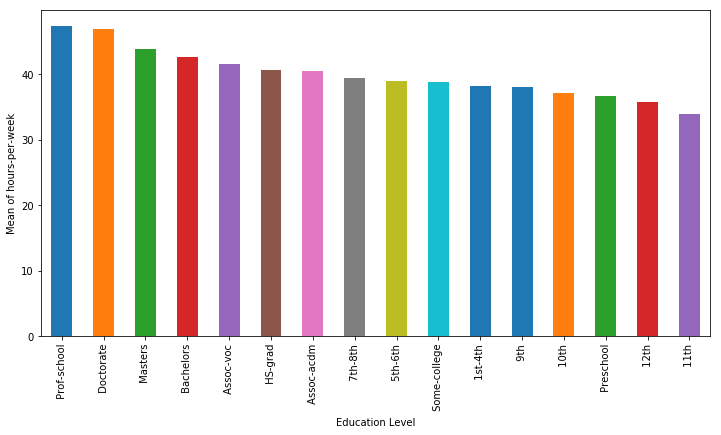

In [142]:
plt.figure(figsize=(12,6))

# group by education and calculate mean of hours-per-week
df_ed = df.groupby(['education']).mean()['hours-per-week'].sort_values(ascending = False).plot.bar()

# show x labels 
plt.xlabel('Education Level')
plt.ylabel('Mean of hours-per-week')
#plt.xticks(np.arange(16), df['education'],rotation=45)


Initially, I was using a line plot for this visualization but switched to bar plot later because the variable on x is not necessarily ordered. The most important attributes should be encoded with the most effective channels in order to be most noticeable and the most effective is aligned spatial position (book page 101) so I sort the mean of hours-per-week from high to low.  
We can tell that  education level and hours-per-week are somehow positively related. It inspired us that maybe we can turn 9th, 10th and etc. into a larger category - junior school to reduce the dimension later.

# Preprocessing
### Standardization for continuous features
If we have one variable range from 0 to 1 and another one from 0 to 100. When we compute the squared error function or a Euclidean distance for the k-nearest neighbors (KNN), the algorithm will mostly be busy in handling the larger errors in the second feature and the distance will be governed by the second feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [143]:
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']] =mms.fit_transform(df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']])

/Users/Ada/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Categorical features
Since our algorithm cannot work with categorical variables, we need to turn categorical variables into dummy variables.

In [144]:
df = pd.get_dummies(df, columns=['workclass', 'education','occupation','marital-status', 
                                     'relationship','race', 'sex',  'native-country','salary'], drop_first=True)

# Split dataset

In [145]:
train, test = train_test_split(df, test_size=0.2)

# Find the optimal hyperparameters (k and p) for a KNN-Classifier

In [19]:
# create X (features) and y (response)
X = train.drop(['salary_ >50K'], axis = 1)
y = train['salary_ >50K']

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (26048, 100)
Y vector dimensionality: (26048,)


In [21]:
# search for an optimal value of K for KNN

# list of integers 1 to 10
k_range = range(1, 11)

# list of scores from k_range
k_scores_mean = []
k_scores_sd = []



# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean and std of scores for k neighbors to k_scores list
    k_scores_mean.append(scores.mean())
    k_scores_sd.append(scores.std())
    
    
k_score_p1 = pd.DataFrame({'mean':k_scores_mean, 'sd':k_scores_sd})
k_score_p1.index = np.arange(1, len(k_score_p1)+1)
k_score_p1.sort_values('mean',ascending=False)

,mean,sd
10,0.831426,0.005168
9,0.830812,0.005490
8,0.830121,0.004441
7,0.828278,0.005562
6,0.826628,0.004281
5,0.824823,0.005185
4,0.819027,0.005771
3,0.817376,0.006183
2,0.809390,0.005769
1,0.793420,0.005144


In [22]:
# search for an optimal value of K for KNN

# list of integers 1 to 10
k_range = range(1, 11)

# list of scores from k_range
k_scores_mean = []
k_scores_sd = []



# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean and std of scores for k neighbors to k_scores list
    k_scores_mean.append(scores.mean())
    k_scores_sd.append(scores.std())
    

k_score_p2 = pd.DataFrame({'mean':k_scores_mean, 'sd':k_scores_sd})

# reindex row number 
k_score_p2.index = np.arange(1, len(k_score_p1)+1)
k_score_p2.sort_values('mean',ascending=False)

,mean,sd
10,0.828700,0.006574
9,0.828624,0.006103
8,0.827549,0.005144
7,0.826858,0.004900
6,0.825399,0.004667
5,0.822520,0.005329
4,0.818604,0.004799
3,0.816109,0.006187
2,0.809352,0.005312
1,0.792076,0.006820


#### If SD is high, the cross-validated estimate of the accuracy might not be as reliable. The optimal hyperparameters k is 10 and p is 1.

# Visualization 3

Text(0, 0.5, 'Cross-Validation Score')

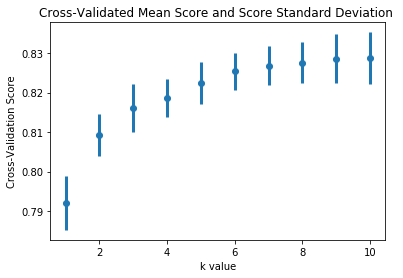

In [37]:
plt.errorbar(k_score_p2.index.values, k_score_p2['mean'], k_score_p2['sd'], fmt='o', lw=3)
plt.title("Cross-Validated Mean Score and Score Standard Deviation ")
plt.xlabel("k-value")
plt.ylabel("Cross-Validation Score")

The error plot is a scatterplot with line encodings. The idiom of scatterplots encodes two quantitative value variables using both the vertical and horizontal spatial position channels, and the mark type is necessarily a point.
The scatterplot helps trend-finding task (Book page 148). The line shows the range of the score per k value.

# Using the optimal hyperparameters, predict the values for your test set and report performance

In [112]:
# create X (features) and y (response)
X_test = test.drop(['salary_ >50K'], axis = 1)
y_test = test['salary_ >50K']

print('X matrix dimensionality:', X_test.shape)
print('Y vector dimensionality:', y_test.shape)

X matrix dimensionality: (6513, 100)
Y vector dimensionality: (6513,)


In [113]:
# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=10, p=1)

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=1,
           weights='uniform')

In [115]:
# make a prediction on test data
result = knn.predict(X_test)

In [132]:
d = {'predict': result, 'actual': y_test}
result_df = pd.DataFrame(data = d)
result_df.head()

,predict,actual
11850,0,1
9127,0,0
13064,0,1
6672,0,0
31910,0,0


In [139]:
# Compute Accurarcy
accuracy = len(result_df[(result_df['predict']==result_df['actual'])])/result_df.shape[0]
accuracy

0.8473821587594043